In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("D:/Data/elo"))

['Data_Dictionary.xlsx', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
test =pd.read_csv("D:/Data/elo/test.csv") 
train = pd.read_csv("D:/Data/elo/train.csv")
his_trans =pd.read_csv("D:/Data/elo/historical_transactions.csv") 
new_merchant_t = pd.read_csv("D:/Data/elo/new_merchant_transactions.csv")
merchants = pd.read_csv("D:/Data/elo/merchants.csv")

In [3]:
print(train.shape)
print(test.shape)
print(merchants.shape)
print(new_merchant_t.shape)
print(his_trans.shape)


(201917, 6)
(123623, 5)
(334696, 22)
(1963031, 14)
(29112361, 14)


In [4]:
train['first_active_month'] = pd.to_datetime(train['first_active_month']).apply(lambda x: x.strftime('%Y-%m'))

In [5]:
print(new_merchant_t.dtypes)
print(his_trans.dtypes)

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object
authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object


In [6]:
new_merchant_t['city_id'] = new_merchant_t['city_id'].astype(object)
new_merchant_t['merchant_category_id'] = new_merchant_t['merchant_category_id'].astype(object)
new_merchant_t['category_2'] = new_merchant_t['category_2'].astype(object)
new_merchant_t['state_id'] = new_merchant_t['state_id'].astype(object)
new_merchant_t['subsector_id'] = new_merchant_t['subsector_id'].astype(object)
new_merchant_t['purchase_date'] = pd.to_datetime(new_merchant_t['purchase_date'])

his_trans['city_id'] = his_trans['city_id'].astype(object)
his_trans['merchant_category_id'] = his_trans['merchant_category_id'].astype(object)
his_trans['category_2'] = his_trans['category_2'].astype(object)
his_trans['state_id'] = his_trans['state_id'].astype(object)
his_trans['subsector_id'] = his_trans['subsector_id'].astype(object)
his_trans['purchase_date'] = pd.to_datetime(his_trans['purchase_date'])

In [7]:
print(merchants.dtypes)

merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
numerical_1                    float64
numerical_2                    float64
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
avg_sales_lag3                 float64
avg_purchases_lag3             float64
active_months_lag3               int64
avg_sales_lag6                 float64
avg_purchases_lag6             float64
active_months_lag6               int64
avg_sales_lag12                float64
avg_purchases_lag12            float64
active_months_lag12              int64
category_4                      object
city_id                          int64
state_id                         int64
category_2                     float64
dtype: object


In [8]:
merchants['merchant_group_id'] = merchants['merchant_group_id'].astype(object)
merchants['merchant_category_id'] = merchants['merchant_category_id'].astype(object)
merchants['subsector_id'] = merchants['subsector_id'].astype(object)
merchants['city_id'] = merchants['city_id'].astype(object)
merchants['state_id'] = merchants['state_id'].astype(object)
merchants['category_2'] = merchants['category_2'].astype(object)

In [9]:
train.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749
5,2016-09,C_ID_0894217f2f,4,2,0,0.871585
6,2016-12,C_ID_7e63323c00,3,2,1,0.230129
7,2017-09,C_ID_dfa21fc124,3,2,1,2.135850
8,2017-08,C_ID_fe0fdac8ea,2,1,0,-0.065406
9,2016-08,C_ID_bf62c0b49d,2,2,0,0.300062


In [10]:
train['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

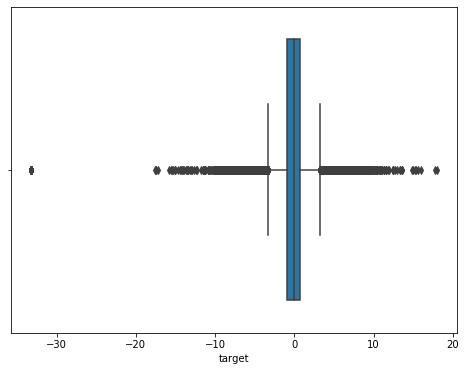

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(train.target)

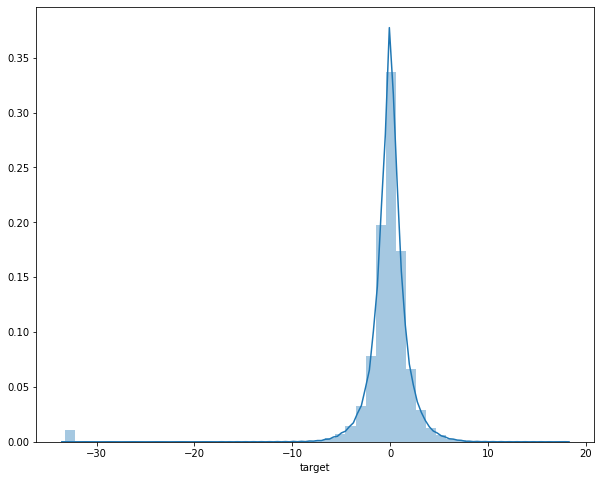

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
sns.distplot(train['target'])

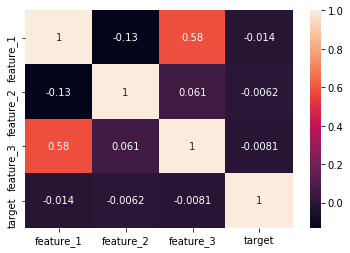

In [13]:
# calculate the correlation matrix
corr = train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

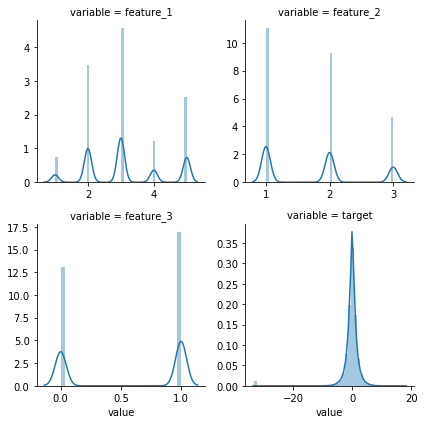

In [14]:
col_list = train.columns.tolist()
col_list = col_list[2:]
f = pd.melt(train, value_vars=col_list)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

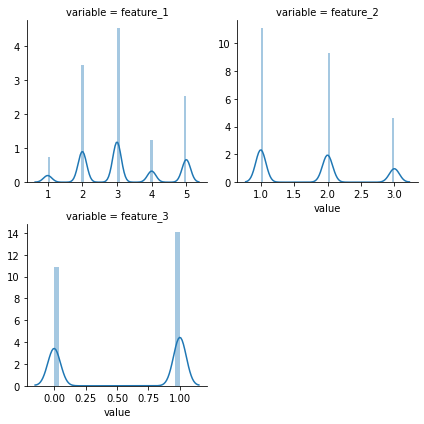

In [15]:
col_list = test.columns.tolist()
col_list = col_list[2:]
f = pd.melt(test, value_vars=col_list)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

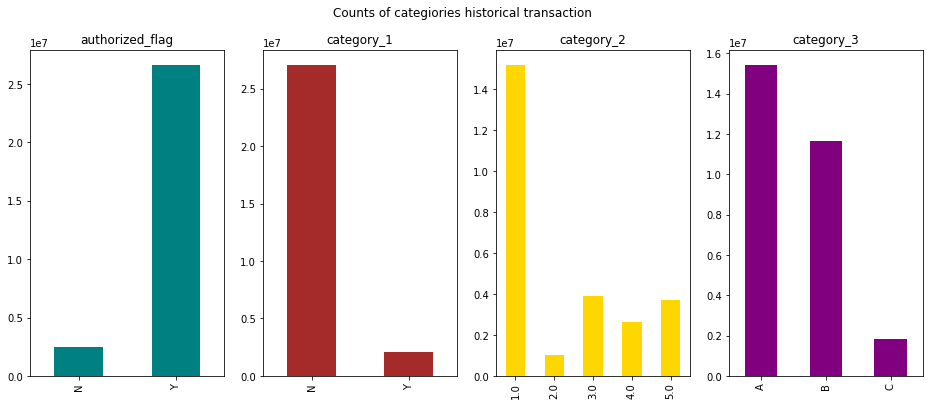

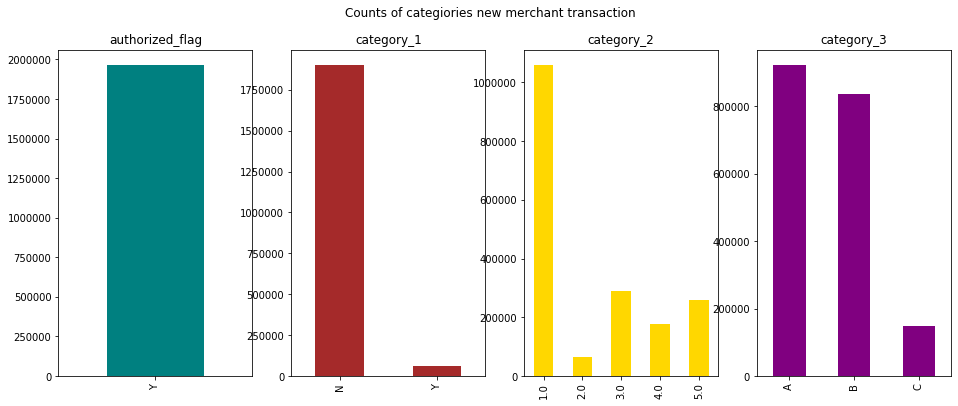

In [16]:
fig, ax = plt.subplots(1, 4, figsize = (16, 6));
his_trans['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='authorized_flag');
his_trans['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_1');
his_trans['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_2');
his_trans['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[3], color='purple', title='category_3');
plt.suptitle('Counts of categiories historical transaction');
fig, ax = plt.subplots(1, 4, figsize = (16, 6));
new_merchant_t['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='authorized_flag');
new_merchant_t['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_1');
new_merchant_t['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_2');
new_merchant_t['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[3], color='purple', title='category_3');
plt.suptitle('Counts of categiories new merchant transaction');

In [17]:
his_trans[his_trans['authorized_flag']=='N'].head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
115,N,C_ID_4e6213e9bc,88,N,0,A,842,M_ID_22c9cfa265,-10,-0.730379,2017-04-07 12:58:09,1,16,37
132,N,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-5,-0.723782,2017-09-17 22:40:27,1,16,16
148,N,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-5,-0.723782,2017-09-17 22:40:26,1,16,16
168,N,C_ID_4e6213e9bc,333,N,0,A,605,M_ID_c2ae34c2ef,0,-0.664262,2018-02-20 10:57:50,1,9,2
213,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:33:31,1,16,34
294,N,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_21e1552dab,-11,-0.734135,2017-03-22 15:53:08,1,16,37
306,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:32:30,1,16,34
365,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:32:49,1,16,34
368,N,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_21e1552dab,-11,-0.734135,2017-03-22 15:52:52,1,16,37
400,N,C_ID_5037ff576e,322,N,1,B,278,M_ID_b61c7d1be0,-3,-0.595260,2017-09-07 20:57:19,3,11,37


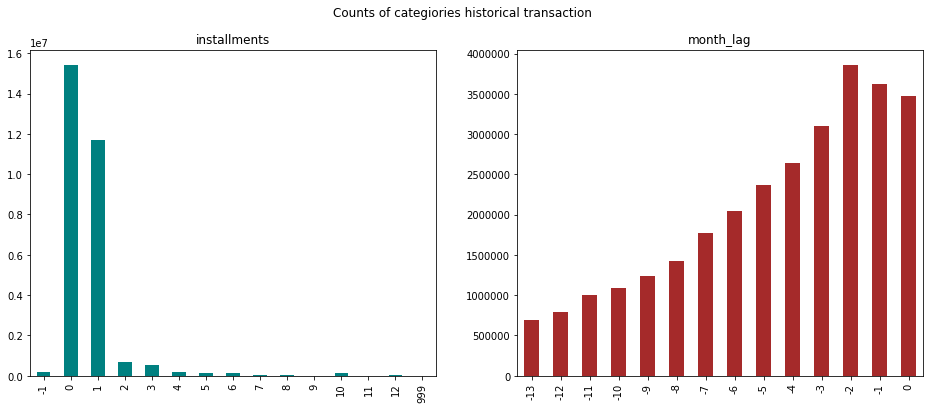

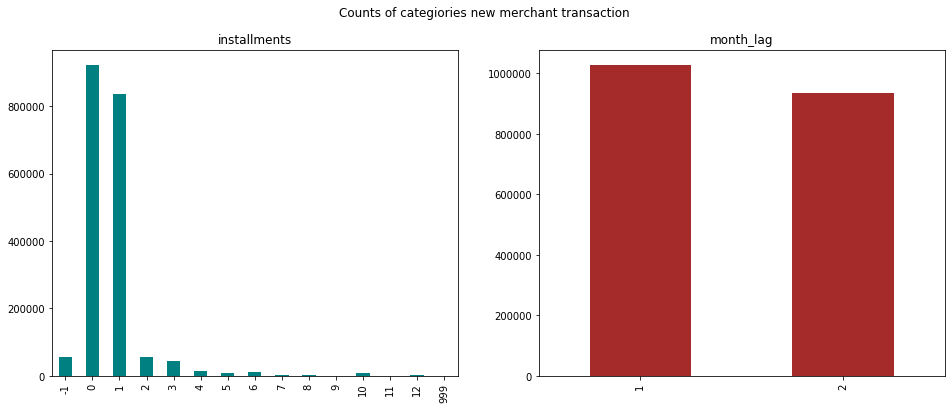

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6));
his_trans['installments'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='installments');
his_trans['month_lag'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='month_lag');
plt.suptitle('Counts of categiories historical transaction');

fig, ax = plt.subplots(1, 2, figsize = (16, 6));
new_merchant_t['installments'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='installments');
new_merchant_t['month_lag'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='month_lag');
plt.suptitle('Counts of categiories new merchant transaction');

In [19]:
his_trans[his_trans['installments']==999].tail()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
28978222,N,C_ID_730f3751de,117,N,999,C,68,M_ID_9a67369473,-1,0.440187,2017-12-13 12:22:29,1,9,27
28996126,N,C_ID_05240c2353,289,N,999,C,60,M_ID_dc44de5cf9,-2,0.697140,2017-08-30 11:35:02,5,5,13
29012755,N,C_ID_2c1f702b6a,330,N,999,C,309,M_ID_ff8fdb0abf,-7,-0.452388,2017-07-21 11:11:05,3,17,21
29018065,Y,C_ID_6715eccea8,174,N,999,C,840,M_ID_fcb061b2bf,-2,0.491983,2017-11-23 23:24:39,1,9,20
29074830,N,C_ID_b3fc559820,183,N,999,C,667,M_ID_6ff763c0ef,-2,-0.511893,2017-12-04 09:47:19,1,9,21


## 할부 숫자가 999 인것은 승인이 거절된 돼있는 경우였음(거의)

### 999가 12개월 이상의 할부개월 수일경우 13으로 바꿀 수도 있음

In [20]:
his_trans[(his_trans['installments']==999) & (his_trans.authorized_flag=='Y')]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
9958645,Y,C_ID_875f80a30c,340,N,999,C,840,M_ID_995feeec61,-3,4.435736,2017-09-20 18:21:42,1,9,20
13456410,Y,C_ID_2e39f9fd94,340,N,999,C,840,M_ID_00f803a717,-4,0.754241,2017-10-28 13:46:13,1,9,20
16172859,Y,C_ID_4d3dbbbb1f,159,N,999,C,840,M_ID_e243972510,-2,0.755743,2017-12-28 19:27:12,1,9,20
24251967,Y,C_ID_82e68c6826,174,N,999,C,840,M_ID_fcb061b2bf,-5,1.806097,2017-09-21 16:37:51,1,9,20
28902917,Y,C_ID_1947a910eb,174,N,999,C,840,M_ID_fcb061b2bf,-2,2.709190,2017-12-17 22:36:08,1,9,20
29018065,Y,C_ID_6715eccea8,174,N,999,C,840,M_ID_fcb061b2bf,-2,0.491983,2017-11-23 23:24:39,1,9,20


In [21]:
his_trans[his_trans['installments']==-1].head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
885,N,C_ID_fc8e41b9cf,251,N,-1,NaN,34,M_ID_c4f5972059,-1,-0.297615,2018-01-23 12:05:13,3,8,38
914,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,391,M_ID_bc5663de31,0,-0.393785,2018-02-21 07:24:59,3,8,7
936,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,307,M_ID_0f437c5559,-3,-0.475694,2017-11-13 00:00:00,3,8,19
941,Y,C_ID_fc8e41b9cf,170,N,-1,NaN,222,M_ID_b7441bb10f,-1,-0.551563,2018-01-09 14:15:12,3,8,21
965,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,514,M_ID_1dd8347bcb,-1,-0.114893,2018-01-23 14:04:39,3,8,9


In [22]:
his_trans[his_trans['city_id']==-1].head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
11,Y,C_ID_4e6213e9bc,-1,N,0,A,560,M_ID_7c5e93af2f,0,-0.727929,2018-02-08 20:05:45,NaN,-1,34
30,Y,C_ID_4e6213e9bc,-1,N,0,A,80,M_ID_98b342c0e3,0,-0.724368,2018-02-27 09:04:48,NaN,-1,37
43,Y,C_ID_4e6213e9bc,-1,N,0,A,278,NaN,0,-0.719154,2018-02-24 10:52:32,NaN,-1,37
80,Y,C_ID_4e6213e9bc,-1,N,0,A,80,M_ID_98b342c0e3,0,-0.724368,2018-02-23 09:20:59,NaN,-1,37
82,Y,C_ID_4e6213e9bc,-1,N,0,A,278,NaN,0,-0.713173,2018-02-25 12:07:37,NaN,-1,37


In [23]:
his_trans[(his_trans['city_id']==-1)&(his_trans['state_id']!=-1)]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id


## 도시 아이디가 -1이라면 주 아이디도 -1임

In [24]:
print(len(his_trans[(his_trans['city_id']!=-1)&(his_trans['state_id']==-1)]))
his_trans[(his_trans['city_id']!=-1)&(his_trans['state_id']==-1)].head()

174240


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
452,Y,C_ID_5037ff576e,331,N,1,B,307,M_ID_1cf20d1419,0,0.244541,2017-12-15 14:02:29,NaN,-1,19
513,Y,C_ID_5037ff576e,331,N,1,B,45,M_ID_54944a940b,0,-0.416325,2017-12-15 15:29:46,NaN,-1,18
904,Y,C_ID_fc8e41b9cf,170,N,1,B,307,M_ID_2e0430b435,-7,-0.626696,2017-07-23 13:15:32,NaN,-1,19
939,Y,C_ID_fc8e41b9cf,170,N,1,B,367,M_ID_37f7529614,0,-0.665765,2018-02-17 13:44:03,NaN,-1,16
946,Y,C_ID_fc8e41b9cf,170,N,1,B,307,M_ID_2e0430b435,-4,-0.236157,2017-10-21 00:00:00,NaN,-1,19


## 도시아이디가 -1이 아닌데도 불구하고 주 아이디는 -1일 수 있음 

In [25]:
merchants.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [26]:
merchants[merchants.avg_sales_lag3.isnull()==True]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,N,E,E,NaN,...,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,N,E,E,NaN,...,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN
10,M_ID_492cfa500c,13462,369,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,inf,6,NaN,inf,12,N,-1,9,1
11,M_ID_73487fed26,17123,427,27,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
12,M_ID_7149162139,2118,63,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,inf,6,NaN,inf,12,Y,88,16,1


## avg_sales_lag의 결측치는 모두 동일한 데이터셋에서 발생.

In [27]:
new_merchant_t.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [28]:
his_trans.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

## 먼저, train data에서 target이 -30보다 작았던 것들 제거

In [29]:
train = train[train.target>-30]

In [30]:
# purchase_amount size per card_id (구매양? 금액?)
c_his = his_trans.groupby("card_id")
c_his = c_his["purchase_amount"].size().reset_index()
c_his.columns = ["card_id","purchase_amount_size"]
train = pd.merge(train, c_his, on="card_id", how="left")

## 구매 양에 따른 충성도 

<function matplotlib.pyplot.show(*args, **kw)>

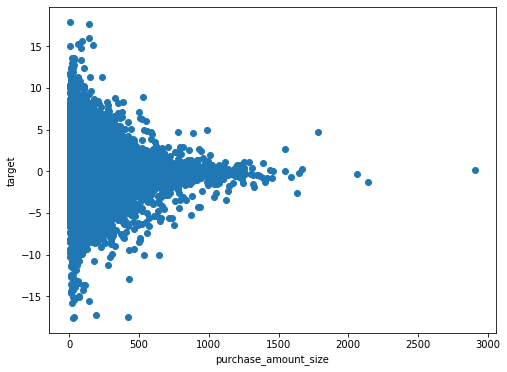

In [31]:
data = pd.concat([train['target'], train['purchase_amount_size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='purchase_amount_size', y="target", data=data)
plt.xlabel("purchase_amount_size")
plt.ylabel("target")
plt.show

## 구매 율과 충성도는 상관이 없다????

In [32]:
# purchase_amount mean per card_id  (카드 아이디당 구매 평균값 )
c_his = his_trans.groupby("card_id")
c_his = c_his["purchase_amount"].mean().reset_index()
c_his.columns = ["card_id","purchase_amount_mean"]
train = pd.merge(train, c_his, on="card_id", how="left")

<function matplotlib.pyplot.show(*args, **kw)>

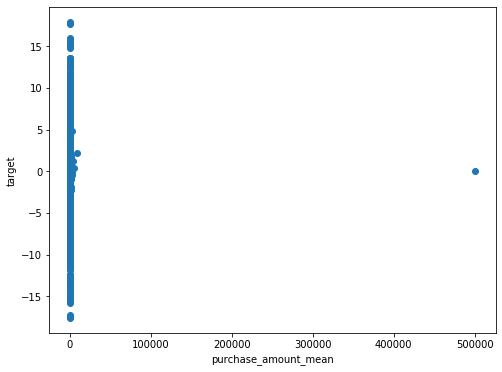

In [33]:
data = pd.concat([train['target'], train['purchase_amount_mean']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='purchase_amount_mean', y="target", data=data)
plt.xlabel("purchase_amount_mean")
plt.ylabel("target")
plt.show

## 평균을 확인해 보는 맨 끝 이상치 확인

In [34]:
train[train['purchase_amount_mean']>400000]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_amount_size,purchase_amount_mean
73274,2017-04,C_ID_3b6ac8e52d,3,1,1,0.072539,12,500883.004724


In [35]:
# purchase_amount 가 이상치 인듯
his_trans[his_trans['purchase_amount']>400000]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
29050360,N,C_ID_3b6ac8e52d,69,N,0,A,683,M_ID_ee49262ab5,-3,6.010604e+06,2017-04-23 06:58:58,1,9,34


<function matplotlib.pyplot.show(*args, **kw)>

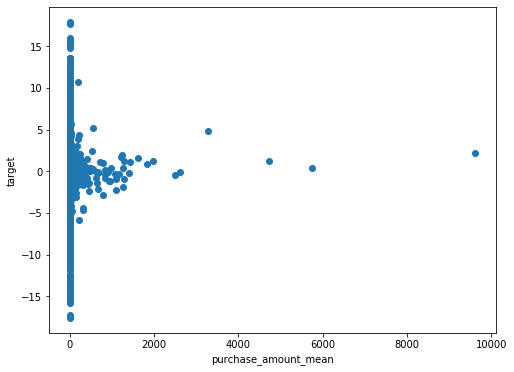

In [36]:
# if remove that point(이상치 제거후)
data = data[data.purchase_amount_mean < 400000]
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='purchase_amount_mean', y="target", data=data)
plt.xlabel("purchase_amount_mean")
plt.ylabel("target")
plt.show

## 할부개월 충성도 

In [37]:
c_his = his_trans.groupby("card_id")
c_his = c_his["installments"].mean().reset_index()
c_his.columns = ["card_id","installments_mean"]
train = pd.merge(train, c_his, on="card_id", how="left")

## 999때문에 평균 값이 안나옴... 처리 어떻게 ? 할지 

<function matplotlib.pyplot.show(*args, **kw)>

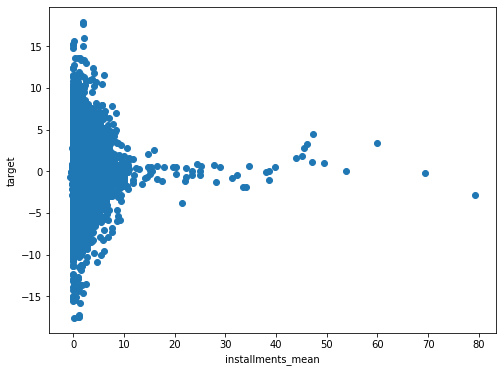

In [38]:
data = pd.concat([train['target'], train['installments_mean']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='installments_mean', y="target", data=data)
plt.xlabel("installments_mean")
plt.ylabel("target")
plt.show

## month_lag 처리

In [39]:
c_his = his_trans.groupby("card_id")
c_his = c_his["month_lag"].max().reset_index()
c_his.columns = ["card_id","month_lag_recent"]
train = pd.merge(train, c_his, on="card_id", how="left")

<function matplotlib.pyplot.show(*args, **kw)>

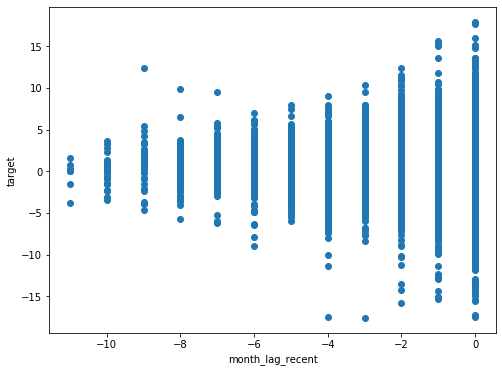

In [40]:
data = pd.concat([train['target'], train['month_lag_recent']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='month_lag_recent', y="target", data=data)
plt.xlabel("month_lag_recent")
plt.ylabel("target")
plt.show

 ## 최근 구매한 경향이 많음 첫 구매 부터 살펴보면

In [41]:
his_trans['purchase_date_month'] = his_trans['purchase_date'].apply(lambda x: x.strftime('%Y-%m'))

In [42]:
c_his = his_trans.groupby("card_id")
c_his = c_his["purchase_date_month"].max().reset_index()
c_his.columns = ["card_id","purchase_date_month_recent"]
train = pd.merge(train, c_his, on="card_id", how="left")

In [43]:
train['purchase_period'] = pd.to_datetime(train['purchase_date_month_recent'])-pd.to_datetime(train['first_active_month'])

In [ ]:
print(train.purchase_period.dtypes)

## for i in range(len(train)):
    train.purchase_period[i] = train.purchase_period[i].days//30

In [ ]:
# calculate the correlation matrix
corr = train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

## train에 거래 데이터를 추가해서 correlation을 다시 확인. 여전히 머가 없음

In [ ]:
new_merchant_t.head()

In [ ]:
# purchase_amount size per card_id (구매건수)
c_his = new_merchant_t.groupby("card_id")
c_his = c_his["purchase_amount"].size().reset_index()
c_his.columns = ["card_id","purchase_amount_size_new"]
train = pd.merge(train, c_his, on="card_id", how="left")

In [ ]:
data = pd.concat([train['target'], train['purchase_amount_size_new']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='purchase_amount_size_new', y="target", data=data)
plt.xlabel("purchase_amount_size_new")
plt.ylabel("target")
plt.show

In [ ]:
# purchase_amount mean per card_id
c_his = new_merchant_t.groupby("card_id")
c_his = c_his["purchase_amount"].mean().reset_index()
c_his.columns = ["card_id","purchase_amount_mean_new"]
train = pd.merge(train, c_his, on="card_id", how="left")

## purchase_amount_mean과 target의 relation을 살펴봤을때, historical에서는 거의 flat한 형태에 가까웠는데 new에서는 조금 더 정규분포처럼 생긴 모양.

In [ ]:
data = pd.concat([train['target'], train['purchase_amount_mean_new']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='purchase_amount_mean_new', y="target", data=data)
plt.xlabel("purchase_amount_mean_new")
plt.ylabel("target")
plt.show

## 구매 할부 개월수 

In [ ]:
c_his = new_merchant_t.groupby("card_id")
c_his = c_his["installments"].mean().reset_index()
c_his.columns = ["card_id","installments_mean_new"]
train = pd.merge(train, c_his, on="card_id", how="left")

In [ ]:
data = pd.concat([train['target'], train['installments_mean_new']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='installments_mean_new', y="target", data=data)
plt.xlabel("installments_mean_new")
plt.ylabel("target")
plt.show

## 이상치값 존재...

In [ ]:
train[train.installments_mean_new>30]
## 999가 이상치여서 그런건가??

In [ ]:
new_merchant_t[new_merchant_t.installments==999]
## new_merchant_trasaction data에 999 installments인 경우가 2가지 존재.

## 그래프 이상함...ㅠㅠ

In [ ]:
# if remove that point,
data = data[data.installments_mean_new<30]
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='installments_mean_new', y="target", data=data)
plt.xlabel("installments_mean_new")
plt.ylabel("target")
plt.show

##  month_lag(month lag to reference date)

In [ ]:
c_his = new_merchant_t.groupby("card_id")
c_his = c_his["month_lag"].max().reset_index()
c_his.columns = ["card_id","month_lag_recent_new"]
train = pd.merge(train, c_his, on="card_id", how="left")

In [ ]:
data = pd.concat([train['target'], train['month_lag_recent_new']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x='month_lag_recent_new', y="target", data=data)
plt.xlabel("month_lag_recent_new")
plt.ylabel("target")
plt.show

## first_active에서 최근 구매까지 기간을 살펴보면,

In [ ]:
new_merchant_t['purchase_date_month'] = new_merchant_t['purchase_date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
c_his = new_merchant_t.groupby("card_id")
c_his = c_his["purchase_date_month"].max().reset_index()
c_his.columns = ["card_id","purchase_date_month_recent_new"]
train = pd.merge(train, c_his, on="card_id", how="left")

In [ ]:
train['purchase_period_new'] = pd.to_datetime(train['purchase_date_month_recent_new'])-pd.to_datetime(train['first_active_month'])

In [ ]:
train.head()

In [ ]:
# Fill null by most frequent data
#df_trans['category_2'].fillna(1.0,inplace=True)
#df_trans['category_3'].fillna('A',inplace=True)
#df_trans['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)

In [ ]:
train.isnull().sum()

In [ ]:
train.dtypes